In [1]:
from IPython.display import display, Math, Latex #Imported for rendering of latex

import numpy as np

# Import for generatring plots
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Quick Recap
1. Training data contains features and label that is a real number
2. Model or inference: $\bf y=Xw$

## C1: Training Data

In [2]:
# Create a dataset of 100 examples with a single feature and a label.
# For this conversation, we use the following three parameters
w1 = 3
w0 = 4
n = 100

x = 10*np.random.randn(n,)

# Obtain y = 4 + 3*x + noise. Noise is randomly sampled.
y = w0 + w1*x + np.random.randn(n,)

Lets examine the shapes of the data for sanity check

In [3]:
print('Shape of training data feature matrix:', x.shape)
print('Shape of label vector:', y.shape)

Shape of training data feature matrix: (100,)
Shape of label vector: (100,)


Let's divide the data into training and test set. We will set aside 20% examples for testing.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Let's do a quick sanity check to make sure the sizes of features and labels sets are identical in both training and test sets

In [5]:
print('Shape of training feature matrix:', X_train.shape)
print('Shape of training label vector:', y_train.shape)

print('Shape of test feature matrix:', X_test.shape)
print('Shape of test label matrix:', y_test.shape)

Shape of training feature matrix: (80,)
Shape of training label vector: (80,)
Shape of test feature matrix: (20,)
Shape of test label matrix: (20,)


Lets quickly check the first few examples and labels

In [6]:
X_train[:5]

array([-3.34854881, -3.37767262, -4.51440968, -1.04558485,  3.34109256])

In [7]:
y_train[:5]

array([-6.22004564, -5.99969968, -8.73277447, -0.18040507, 14.79484836])

Lets visualize the training set

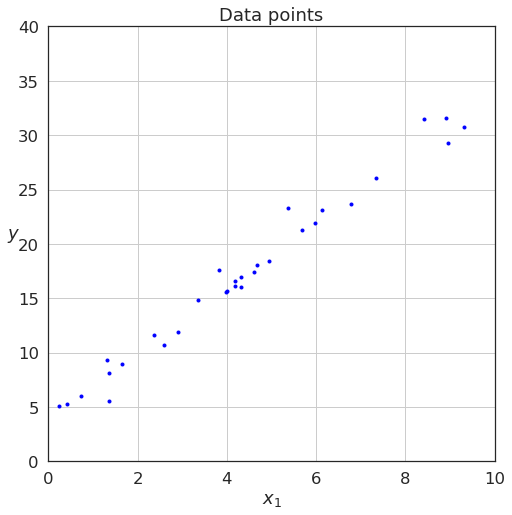

In [8]:
sns.set_style("white")
f = plt.figure(figsize=(8, 8))
sns.set_context("notebook", font_scale=1.5, rc={'lines.linewidth': 2.5})

plt.plot(X_train, y_train, "b.")
plt.title("Data points")
plt.grid(True)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 10, 0, 40])

plt.show()

We have a training set consisting of a single feature so we will fit a simple linear regression model with one feature. It's form is : $y=w_0+w_1x_1$

As discussed in the lecture, we will add a special feature $x_0$ and set it to 1. We can create a helper function for that.

In [9]:
def add_dummy_feature(x):
    ''' Adds a dummy feature to the dataset.
    Args:
        x: Training dataset
    Returns:
        Training dataset with an addition of dummy feature.
    '''
    # np.ones(X.shape[0]) create a vector of 1's having the same number of 
    # rows as number of samples in dataset.
    return np.column_stack((np.ones(x.shape[0]),x))

Let's write a test case to test this function:

For that let's take a two examples and three features. The first example is a feature vector:
$$\textbf{x}_{3\times1}^{(1)} = \begin{bmatrix} 3 \\ 2 \\ 5 \end{bmatrix}$$

And the second example is:
$$\textbf{x}_{3\times1}^{(2)} = \begin{bmatrix} 9 \\ 4 \\ 7 \end{bmatrix}$$

And recall that a feature matrix $\bf X$  has a shape *(n,m)* corresponding to features of all examples before adding the dummy feature $x_0$.
$$\textbf{X}_{n\times m} = \begin{bmatrix} {-(x^{(1)})^T-} \\ {-(x^{(2)})^T-} \\ . \\ . \\ . \\ {-(x^{(n)})^T-} \end{bmatrix}$$

In our current example, this becomes:
$$\textbf{X}_{2\times3} = \begin{bmatrix} {-(x^{(1)})^T-} \\ {-(x^{(2)})^T-} \end{bmatrix}$$


The corresponding feature matrix $\bf X$ appears as follows:
$$\textbf{X}_{2\times3} = \begin{bmatrix} 3 & 2 & 5 \\ 9 & 4 & 7 \end{bmatrix}$$

Here the feature vectors are transposed an represented as rows:
- The first row corresponds to the first example $(\textbf{x}^{(1)})^T$ and 
- The second row corresponds to the second example $(\textbf{x}^{(2)})^T$.


Once we add the dummy feature , the resulting matrix becomes:
$$\textbf{X}_{2\times(3+1)} = \begin{bmatrix} {-(x^{(1)})^T-} \\ {-(x^{(2)})^T-} \end{bmatrix} = \begin{bmatrix} 1 & 3 & 2 & 5 \\ 1 & 9 & 4 & 7 \end{bmatrix}$$

In [10]:
import unittest

class TestAddDummyFeature(unittest.TestCase):

    def test_add_dummy_feature(self):
        ''' Test case function for add_dummy_feature '''
        train_matrix = np.array([[3, 4, 5],[9, 4, 7]])
        train_matrix_with_dummy_feature = add_dummy_feature(train_matrix)

        #Test the shape
        self.assertEqual(train_matrix_with_dummy_feature.shape, (2,4))

        #and the contents
        np.testing.assert_array_equal(
            train_matrix_with_dummy_feature, np.array([[1, 3, 4, 5],[1, 9, 4, 7]]))

unittest.main(argv=[''], defaultTest='TestAddDummyFeature', verbosity=2, exit=False)

test_add_dummy_feature (__main__.TestAddDummyFeature)
Test case function for add_dummy_feature ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [11]:
add_dummy_feature(np.array([[3, 2],[5, 4]]))

array([[1., 3., 2.],
       [1., 5., 4.]])

Let's preprocess the training set to add the dummy feature

In [12]:
print('Before adding the dummy feature:\n', X_train[:5])
print("\n")

X_train_with_dummy = add_dummy_feature(X_train)
print('After adding the dummy feature:\n', X_train_with_dummy[:5,:])

Before adding the dummy feature:
 [-3.34854881 -3.37767262 -4.51440968 -1.04558485  3.34109256]


After adding the dummy feature:
 [[ 1.         -3.34854881]
 [ 1.         -3.37767262]
 [ 1.         -4.51440968]
 [ 1.         -1.04558485]
 [ 1.          3.34109256]]


## C2. Model

In [13]:
'''Library import'''

'Library import'

### Quick Recap
1. Training data contains features and label that is a real number
2. Linear regression model uses linear combination of features to obtain output labels.In vectorized form Model or inference: $\bf y=Xw$

**Note**:
- Model is paramterized by its weight vector.
- It is described by its mathematical form and weight vector.

### Implementation
The general vectorized form is as follows:
$$\textbf{y}_{(n\times1)}=\textbf{X}_{n\times(m+1)}\textbf{w}_{(m+1)\times1}$$
where
- $n$ is the number of examples in dataset(train/test/validation).
- $m$ is the number of features
- $\bf X$ is a feature matrix which contain $(m+1)$ features for $n$ examples along rows. (Notice capital case bold **X** used for matrix)
- $\bf w$ is a weight vector containing $(m+1)$ weights one for each feature. (Notice the small case bold **w**)
- $\bf y$ is a label vector containing labels of $n$ examples with shape $(n,)$.

In [14]:
def predict(X,w):
    ''' Prediction of output label for a given input.
    Args:
        X: Feature matrix of shape (n, m+1).
        w: weight vector of shape (m+1, n).
    Returns:
        y: Predicted label vector of shape (n,).
    '''
    # Check to make sure that feature matrix and weight vector  have compatible shapes.
    #print(X.shape,w.shape)
    assert X.shape[-1] == w.shape[0]
    return X @ w

We test this function with the following feature matrix $\textbf{X}_{2\times(3+1)}$
$$\textbf{X}_{2\times4} = \begin{bmatrix}
    1 & 3 & 2 & 5 \\ 1 & 9 & 4 & 7
\end{bmatrix}$$
and the weight vector $\bf w$
$$\textbf{w}_{4\times1} = \begin{bmatrix}
    1 \\ 1 \\ 1 \\ 1    
\end{bmatrix}$$
Let's perform a matrix vector multiplication between feature matrix $\bf X$ and the weight vector $\bf w$ to obtain labels for all examples:
$$\begin{align*}
    \textbf{y} 
    &= \textbf{Xw} \\
    &= \begin{bmatrix} 1 & 3 & 2 & 5 \\ 1 & 9 & 4 & 7 \end{bmatrix} \times \begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix} \\
    &= \begin{bmatrix} {1\times1+3\times1+2\times1+5\times1} \\ {1\times1+9\times1+4\times1+7\times1} \end{bmatrix} \\
    &= \begin{bmatrix} 11 \\ 21 \end{bmatrix}
\end{align*}


In [15]:
import unittest

class TestPredict(unittest.TestCase):

    def test_predict(self):
        ''' Test case predict function of linear regression '''
        # set up
        train_matrix = np.array([[1,3,2,5],[1,9,4,7]])
        weight_vector = np.array([1,1,1,1])
        expected_label_vector = np.array([11,21])

        #call
        predicted_label_vector = predict(train_matrix, weight_vector)

        #asserts
        #test the shape
        self.assertEqual(predicted_label_vector.shape,(2,))

        #and the contents
        np.testing.assert_array_equal(
            expected_label_vector,predicted_label_vector)

unittest.main(argv=[''], defaultTest='TestPredict', verbosity=2, exit=False)


test_predict (__main__.TestPredict)
Test case predict function of linear regression ... ok

----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [16]:
''' Preparing the dataset'''
[w0,w1] = [4,3]
n = 100
x = 10*np.random.randn(n,)
y = w0 + w1*x + np.random.randn(n,)



In [17]:
''' Preprocessing: Dummy feature and train-test-split'''
X_with_dummy = add_dummy_feature(x)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_with_dummy, y, test_size=0.2, random_state=42)

print('Shape of training feature matrix:', X_train.shape)
print('Shape of training label vector:', y_train.shape)

print('Shape of test feature matrix:', X_test.shape)
print('Shape of test label matrix:', y_test.shape)

Shape of training feature matrix: (80, 2)
Shape of training label vector: (80,)
Shape of test feature matrix: (20, 2)
Shape of test label matrix: (20,)


Since we have not yet trained our model, let's use a random weight vector to get predictions from our model for a given dataset.

In [18]:
w = np.random.rand(2,)
w

array([0.89895308, 0.04647378])

In [19]:
y_hat = predict(X_train,w)

Let's compare the prediction with actual value

In [20]:
y_hat[:10]

array([1.13988231, 1.80409989, 0.80858219, 0.42863456, 0.83361928,
       0.39458942, 0.72057461, 1.25365063, 1.44528051, 1.08061938])

Actual labels are

In [21]:
y[:10]

array([ 29.41814809,  -8.6849606 ,  41.89470336,  16.46957661,
        23.92187176, -18.52354947,  76.7279102 , -39.30318404,
        34.89327557,  37.66510293])

Since we use a random weight vector $\bf w$ here, most of the predicted labels do not match the actual labels.

### Comparision of vectorized and non-vectorized version of inference.

In [22]:
def non_vectorized_predict(X,w):
    '''Prediction of output for a given input.
    Args:
        X: Feature matrix of shape (n, m+1)
        w: Weight vector of shape (m+1, n)
    Returns:
        y: Predicted label vector of shape (n, ).
    '''
    y = []
    for i in range(0,X.shape[0]):
        y_hat_i = 0
        for j in range(0,X.shape[1]):
            y_hat_i += X[i][j]*w[j]
        y.append(y_hat_i)
    return np.array(y)
    

Let's test this function with the same setup as vectorized implementation.

In [23]:
import unittest

class TestPredictNonVectorized(unittest.TestCase):

    def test_predict_non_vectorized(self):
        '''Test case predict function of linear regression '''
        #set up
        train_matrix = np.array([[1,3,2,5],[1,9,4,7]])
        weight_vector = np.array([1,1,1,1])
        expected_label_vector = np.array([11,21])

        #call
        predicted_label_vector = non_vectorized_predict(train_matrix,weight_vector)

        #asserts
        #test the shape
        self.assertEqual(predicted_label_vector.shape, (2,))

        #and its contents
        np.testing.assert_array_equal(
            expected_label_vector, predicted_label_vector)

unittest.main(argv=[''],defaultTest='TestPredictNonVectorized', verbosity=2, exit=False)

test_predict_non_vectorized (__main__.TestPredictNonVectorized)
Test case predict function of linear regression ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


lets compare run time of vectorized and non-vectorized versions on dataset with 100 examples.

In [24]:
import time

start_time = time.time()
y_hat_vectorized = predict(X_train,w)
end_time = time.time()
print('Total time incurred in the vectorized inference is %0.9f s'%(end_time-start_time))

start_time = time.time()
y_hat_non_vectorized = non_vectorized_predict(X_train,w)
end_time = time.time()
print('Total time incurred in the non-vectorized inference is %0.9f s'%(end_time-start_time))

np.testing.assert_array_equal(y_hat_vectorized,y_hat_non_vectorized)

Total time incurred in the vectorized inference is 0.000274420 s
Total time incurred in the non-vectorized inference is 0.000319242 s


In [25]:
def loss(X,y,w):
    e  = predict(X,w) - y
    return 0.5*(np.transpose(e) @ e)

X=np.array([[1,2,2,1],[1,1,3,2]])
y=np.array([3,5])
w=np.array([1,2,3,4])*2
a=loss(X,y,w)
print(a)

977.0


#### Normal equation
The weight vector is estimated by matrix multiplication of pseudo-inverse of feature matrix and label vector.

The vectorized implementation is fairly straight forward.
- We make use of ``np.linalg.pinv`` for calculating pseudo inverse of the feature matrix

In [26]:
def normal_equation(X, y):
    '''Estimates parameters of the linear regression model with normal equation
    Args:
        X: feature matrix for given inputs.
        y: Actual label vector

    Returns:
        Weight vector
    '''
    return np.linalg.pinv(X) @ y

We test this function with generated training set whose weight vector is known to us.
- We setup the test with feature matrix, label vector and expected weight vectors
- Next we estimate the weight vector with ``normal_equation`` function.
- We test (a) shape and (ii) match between expected and estimated weight vectors. 

In [27]:
import unittest

class TestNormalEquation(unittest.TestCase):

    def test_normal_equation(self):
        '''
        Test case for weight estimation for linear regression with normal equation method
        '''

        # set up
        feature_matrix = X_train
        label_vector = y_train
        expected_weight_vector = np.array([4.,3.])

        #call
        estimated_weight_vector = normal_equation(feature_matrix,label_vector)

        #asserts
        #test the shape
        self.assertEqual(estimated_weight_vector.shape, (2,))

        #and the contents
        np.testing.assert_array_almost_equal(estimated_weight_vector, expected_weight_vector,decimal=0)

unittest.main(argv=[''],defaultTest='TestNormalEquation', verbosity=2, exit=False)

test_normal_equation (__main__.TestNormalEquation)
Test case for weight estimation for linear regression with normal equation method ... ok

----------------------------------------------------------------------
Ran 1 test in 0.006s

OK


### Gradient Descent(GD)
GD is implemented as follows
- Randomly initialize $w$ to 0.
- Iterate until convergence:
  - Calculate partial derivative of loss w.r.t weight vector
  - Calculate new values of weights
  - Update weights to new values simultaneously

We use number of epochs as a convergence criteria in this implementation
#### Partial derivative of loss function
Let's first implement a function to calculate partial derivative of loss function, which is obtained with the following equation:
$$\bf \frac{\partial}{\partial w}J(w) = X^T(Xw - y)$$
The multiplication of transpose of feature matrix with the difference of predicted and actual label vectors.

In [28]:
def calculate_gradient(X,y,w):
    '''Calculate gradients of loss function w.r.t weight vector on training set
    Arguments:
        X: Feature matrix for training data
        y: label vector of training data
        w: Weight vector

    Returns:
        A vector of gradients
    '''
    return np.transpose(X) @ (predict(X,w) - y)

In [29]:
def update_weights(w, grad, lr):
    ''' Updates the weights based on the gradient of the loss function.
    Weight updates are carried out with the following formula:
        w_new := w_old -lr*grad
    Args:
        1. w: weight vector
        2. grad: gradient of loss w.r.t w
        3. lr: learning rate
    Returns:
        Updated weight vector
    '''
    return (w - lr*grad)


In [30]:
def gradient_descent(X:np.ndarray, y:np.ndarray, lr:float, num_epochs:int):
    '''Estimates parameters of linear regression model through gradient descent.
    Args:
        X: feature matrix for training data.
        y: label vector for training data
        lr: learning rate
        num_epochs: Number of training steps
    Returns:
        Weight vector: Final weight vector
        Error vector across different iterations
        Weight vectors across different iterations
    '''
    w_all = [] # All parameters across different iterations
    err_all = [] # All errors across different iterations
    
    # Parameter vector initialized to [0,0]
    w = np.zeros(X.shape[1])
    # gradient descent loop
    print()
    for i in np.arange(0,num_epochs):
        w_all.append(w)
        err_all.append(loss(X=X,w=w,y=y))
        dJdw = calculate_gradient(X=X,y=y,w=w)
        if (i%100) == 0:
            print('Iteration #: %d, loss: %4.2f'%(i, err_all[-1]))
        w = update_weights(w=w,grad=dJdw,lr=lr)
    return w, err_all, w_all

In [31]:
class TestGradientDescent(unittest.TestCase):

    def test_gradient_descent(self):
        '''
        Test case for weight estimation for linear regression with gradient descent
        '''

        #setup
        feature_matrix = X_train
        label_vector = y_train
        expected_weights = np.array([4.,3.])

        #call
        w, err_all, w_all = gradient_descent(
            feature_matrix, label_vector, lr=0.0001, num_epochs=2000)
        self.assertEqual(w.shape, (2,))
        
        np.testing.assert_array_almost_equal(expected_weights, w, decimal=0)

unittest.main(argv=[''], defaultTest='TestGradientDescent',verbosity=2,exit=False)

test_gradient_descent (__main__.TestGradientDescent)
Test case for weight estimation for linear regression with gradient descent ... 


Iteration #: 0, loss: 41852.70
Iteration #: 100, loss: 180.15
Iteration #: 200, loss: 76.59
Iteration #: 300, loss: 54.98
Iteration #: 400, loss: 50.47
Iteration #: 500, loss: 49.53
Iteration #: 600, loss: 49.34
Iteration #: 700, loss: 49.30
Iteration #: 800, loss: 49.29
Iteration #: 900, loss: 49.29
Iteration #: 1000, loss: 49.29
Iteration #: 1100, loss: 49.29
Iteration #: 1200, loss: 49.29
Iteration #: 1300, loss: 49.29
Iteration #: 1400, loss: 49.29
Iteration #: 1500, loss: 49.29
Iteration #: 1600, loss: 49.29
Iteration #: 1700, loss: 49.29
Iteration #: 1800, loss: 49.29
Iteration #: 1900, loss: 49.29


ok

----------------------------------------------------------------------
Ran 1 test in 0.123s

OK


### Mini-batch gradient descent (MBGD)
The key idea is to perform weight updates by computing gradient on batches of small number of examples

In [32]:
t0, t1 = 200, 100000
def learning_schedule(t):
    return t0/(t+t1)

In [33]:
def mini_batch_gd(X:np.ndarray, y:np.ndarray, num_iters:int, minibatch_size:int):
    w_all = []
    err_all = []

    w = np.zeros((X.shape[1]))
    t=0

    for epoch in range(num_iters):
        shuffled_indices = np.random.permutation(X.shape[0])
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, X.shape[0], minibatch_size):
            t += 1
            xi = X_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            #print(xi.shape[-1] == w.shape[0])
            err_all.append(loss(xi,yi,w))
            
            gradients = 2/minibatch_size * calculate_gradient(xi, yi, w)
            lr = learning_schedule(t)
            w = update_weights(w, gradients, lr)
            w_all.append(w)
    return w, err_all, w_all

In [34]:
class TestMiniBatchGradientDescent(unittest.TestCase):

    def test_minibatch_gd(self):
        '''
        Test case for weight estimation for linear regression with gradient descent
        '''

        #setup
        feature_matrix = X_train
        label_vector = y_train
        expected_weights = np.array([4.,3.])

        #call
        w, err_all, w_all = mini_batch_gd(
            feature_matrix, label_vector, num_iters=200, minibatch_size=8)
        self.assertEqual(w.shape, (2,))
        
        np.testing.assert_array_almost_equal(expected_weights, w, decimal=0)

unittest.main(argv=[''], defaultTest='TestMiniBatchGradientDescent',verbosity=2,exit=False)

test_minibatch_gd (__main__.TestMiniBatchGradientDescent)
Test case for weight estimation for linear regression with gradient descent ... ok

----------------------------------------------------------------------
Ran 1 test in 0.104s

OK


### Stochastic Gradient Descent (SGD)
It is infact MBGD but with number of example per batch =1

In [35]:
def sgd(X:np.ndarray, y:np.ndarray, num_epochs:int):
    w_all = []
    err_all = []

    w = np.zeros((X.shape[1]))
    t=0

    for epoch in range(num_epochs):
        for i in range(X.shape[0]):
            random_index = np.random.randint(X.shape[0])
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            err_all.append(loss(xi, yi, w))

            gradients = 2 * calculate_gradient(xi, yi, w)
            lr = learning_schedule(epoch * X.shape[0] + i)
            w = update_weights(w, gradients, lr)
            w_all.append(w)
    return w, err_all, w_all

In [36]:
class TestStochasticGradientDescent(unittest.TestCase):

    def test_sgd(self):
        '''
        Test case for weight estimation for linear regression with gradient descent
        '''

        #setup
        feature_matrix = X_train
        label_vector = y_train
        expected_weights = np.array([4.,3.])

        #call
        w, err_all, w_all = sgd(
            feature_matrix, label_vector, 200)
        self.assertEqual(w.shape, (2,))
        
        np.testing.assert_array_almost_equal(expected_weights, w, decimal=0)

unittest.main(argv=[''], defaultTest='TestStochasticGradientDescent',verbosity=2,exit=False)

test_sgd (__main__.TestStochasticGradientDescent)
Test case for weight estimation for linear regression with gradient descent ... ok

----------------------------------------------------------------------
Ran 1 test in 0.607s

OK


### Linear Regression: combining all components
This part combines all the functions and components we implemented in the previous lectures.

In [2]:
from IPython.display import display, Math, Latex

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Let's combine implementations of different components of Linear Regression that we implemented so far into a single ``LinearRegression``.

In [ ]:
class LinReg(object):
    '''
    Linear Regression model
    -----------------------
    y = X @ w
    X: A feature matrix
    w: weight vector
    y: label vector
    '''

    def __init__(self):
        self.t0 = 200
        self.t1 = 100000
    
    def predict(self , X:np.ndarray) -> np.ndarray:
        '''
        Prediction of output label for a given input.

        Args:
            X: Feature matrix for given inputs.
        Returns:
            y: Output vector as predicted by the given model.
        '''
        y = x @ self.w
        return y
    
    def loss(self, X: np.ndarray, y: np.ndarray) -> float:
        '''
        Calculate the loss for a model based on known labels

        Args:
            X: Feature matrix for given inputs.
            y: Output label vector as predicted by the given model.
        Returns:
            Loss
        '''

        e = y - self.predict(X)
        return 0.5* (np.transpose(e)) @ e
    
    def rmse (self, X: np.ndarray, y: np.ndarray) -> float:
        '''
        Calculate the root mean squared error of predictions w.r.t actual label.

        Args:
            X: Feature matrix for given inputs.
            y: Output label vector as predicted by the given model
        Returns:
            Loss
        '''
        return np.sqrt((2/X.shape[0])) * self.loss(X,y)
    

    def fit (self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        '''
        Estimates the parameters of the linear regression model with normal equation

        Args:
            X: Feature matrix for given inputs.
            y: Output label vector as predicted by the given model
        Returns:
            weight vector
        '''
        self.w = np.linalg.pinv(X) @ y
        return self.w
    

    def calculate_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        '''
        Calculates gradients of loss function w.r.t weight vector on training set.
        Args:
            X: Feature matrix for given inputs.
            y: Output label vector as predicted by the given model
        Returns:
            a vector of gradients.
        '''
        return np.transpose(X) @ (self.predict(X) - y)
    
    def update_weights (self, grad:np.ndarray, lr: float) -> np.ndarray:
        '''
        Updates the weights based on the gradient of the loss function.

        Weight updates are carried out with the following formula:
            w_new := w_old - lr * grad
        Args:
            1. w: weight vector
            2. grad: gradient of loss w.r.t w
            3. lr: learning rate
        Returns:
            Updated weight vector
        '''
        return (self.w - lr * grad)

    def learning_schedule(self, t):
        return self.t0 / (t + self.t1)
    
    def gd(self, X: np.ndarray, y:np.ndarray, num_epochs:int, lr:float) -> np.ndarray:
        '''
        Estimates the parameters of linear regression model through gradient descent

        Args:
            X: Feature matrix for training data
            y: Label vector for training data
            num_epochs: Number of training steps
            lr: learning rate

        Returns:
            Weight vector: Final weight vector
        '''
        self.w = np.zeros((X.shape[1]))
        self.w_all = []
        self.err_all = []
        for i in np.arange(0,num_epochs):
            dJdw = self.calculate_gradient(X, y)
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X,y))
            self.w = self.update_weights(dJdw, lr)
        return self.w
    
    def mbgd (self, X:np.ndarray, y:np.ndarray, num_epochs:int, batch_size:int) -> np.ndarray:
        '''
        Estimates the parameters of linear regression model through gradient descent

        Args:
            X: Feature matrix for training data
            y: Label vector for training data
            num_epochs: Number of training steps
            batch_size: Number of examples in a batch

        Returns:
            Weight vector: Final weight vector
        '''
        self.w = np.zeros((X.shape[1]))
        self.w_all = []
        self.err_all = []
        mini_batch_id = 0

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shap[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                xi = X_shuffled[i: i+batch_size]
                yi = y_shuffled[i: i+batch_size]
                self.w_all.append(self.w)
                self.err_all.append(self.loss(xi, yi))

                dJdw = 2/batch_size * self.calculate_gradient(xi, yi)
                self.w = self.update_weights(dJdw, self.learning_schedule(mini_batch_id))
            
        return self.w
    
    def sgd (self, X: np.ndarray, y:np.ndarray, num_epochs:int) -> np.ndarray:
        '''
        Estimates the parameters of linear regression model through gradient descent

        Args:
            X: Feature matrix for training data
            y: Label vector for training data
            num_epochs: Number of training steps
            batch_size: Number of examples in a batch

        Returns:
            Weight vector: Final weight vector
        '''
        self.w = np.zeros((X.shape[1]))
        self.w_all = []
        self.err_all = []
        
        for epoch in range(num_epochs):
            for i in range(X.shape[0]):
                random_index = np.random.randint(X.shape[0])
                xi = X[random_index:random_index+1]
                yi = y[random_index:random_index+1]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(xi,yi))

                gradients = 2 * self.calculate_gradient(xi, yi)
                lr = self.learning_schedule(epoch * X.shape[0] +i)
                self.w = self.update_weights(gradients, lr)
        
        return self.w